<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Subreddit Classifier - Tea or Coffee?
By Amira (DSI-28-SG)

---
# Problem Statement

We are a team of data scientists working for Coffea Vibes, a beverage company. The company is venturing into e-commerce and will be launching its own website/application selling coffee and tea products to consumers. We have been tasked to build a classification model that can accurately distinguish between coffee and tea in textual data.

Our classification model will contribute to the following use cases:

1. Our web development team can optimise the recommender systems so as to accurately suggest related products and advertisements to our potential consumers who might have varying preferences for coffee or tea.
2. Our business insights team can leverage on the classification model to correctly distinguish customer feedback on coffee and tea (e.g. through emails) and comments made on the company's social media pages, to aid better understanding of customer's feedback and take appropriate actions quickly, if necessary.

We evaluated the models based on the following criteria:

1. Accuracy scores (the higher, the better)
2. Delta between train and test scores (the smaller, the better)
3. Clear distinction of important features i.e. words to distinguish coffee and tea

---
# Structure

To organise my work better, I have organised this project into two notebooks: 

* Notebook 1 : Data Acquisition
* Notebook 2: Data Cleaning & Exploratory Data Analysis
* Notebook 3: Modelling & Model Evaluation

<span style='color:red'>**This is Notebook 2.**</span>

---
## Part 2: Exploratory Data Analysis & Data Cleaning

In [1]:
# import required libraries/packages

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats

import re
import string
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

In [2]:
# load csv files

coffee = pd.read_csv('./data/coffee.csv')
tea = pd.read_csv('./data/tea.csv')

## Summary

1. Coffee df has 2000 rows;81 columns, while tea df has 1993 rows; 83 features. 
2. Both dfs contain numeric values are mostly metadata, and these will be ignored as the focus of this project is on NLP. 
3. Coffee df contains posts created between 15 Apr 2022 and 24 May 2022. 
4. Tea df contains posts created between 28 Mar 2022 and 24 May 2022. 
5. Coffee df seems to garner more posts than tea df. 

**These are the data cleaning steps that I took:**

1. Filtered out rows that have been removed or deleted using the indicators in 'removed_by_category' column.
2. Removed duplicated rows based on exact matches in 'title', 'selftext' and 'subreddit' columns.
3. Replaced null values in 'selftext' with empty space ' '. 
4. Merged 'title' and 'selftext' into one column: 'full_text'.
5. Utilised regex to remove strings like urls, html tag for new lines ('\n'), etc. 
6. Applied a series of text data cleaning steps including lowercase, removing punctuations, removing digits, tokenizing, lemmatizing and removing english stopwords. 

In [3]:
print(coffee.shape)
print(tea.shape)

(2000, 81)
(1993, 83)


In [4]:
coffee.tail()

,all_awardings,allow_live_comments,author,author_flair_background_color,author_flair_css_class,author_flair_text,author_flair_text_color,author_is_blocked,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_flair_richtext,author_flair_type,author_fullname,author_patreon_flair,author_premium,author_flair_template_id,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,gallery_data,is_gallery,media_metadata,suggested_sort,distinguished,media,media_embed,secure_media,secure_media_embed,author_cakeday,banned_by,call_to_action,category
1995,[],False,skmontreal,,,,,False,[],False,False,1650024682,cbc.ca,https://www.reddit.com/r/Coffee/comments/u46nlv/java_champion_shares_awardwinning_cup_of_joe/,{},u46nlv,False,True,False,False,False,True,False,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/Coffee/comments/u46nlv/java_champion_shares_awardwinning_cup_of_joe/,False,6,,1650024692,1,NaN,True,False,False,Coffee,t5_2qhze,971221,public,default,Java champion shares award-winning cup of joe recipe | CBC.ca,0,[],1.0,https://www.cbc.ca/player/play/2022993987762,all_ads,6,[],text,t2_15atctia,False,False,,link,"{'enabled': False, 'images': [{'id': '2cNwXe1NF0nNJ0pzC1NMMKVKKW8fZ2ldr2RH4upjRHM', 'resolutions...",78.0,140.0,https://www.cbc.ca/player/play/2022993987762,,,,,,,,,,,,,
1996,[],False,AnyCraicSham,,,,,False,[],False,False,1650022912,self.Coffee,https://www.reddit.com/r/Coffee/comments/u465h3/why_does_my_coffee_smell_strongly_of_parmesan/,{},u465h3,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/u465h3/why_does_my_coffee_smell_strongly_of_parmesan/,False,6,,1650022923,1,"**What I did:**\n3 cup Moka pot\n20 clicks comandante\nAeropress filter\n""Tropical Fruit"" from N...",True,False,False,Coffee,t5_2qhze,971211,public,self,Why does my coffee smell strongly of parmesan cheese?,0,[],1.0,https://www.reddit.com/r/Coffee/comments/u465h3/why_does_my_coffee_smell_strongly_of_parmesan/,all_ads,6,[],text,t2_9dfrkbnp,False,False,,,,,,,,,,,,,,,,,,,
1997,[],False,InamiChika,,,,,False,[],False,False,1650022147,self.Coffee,https://www.reddit.com/r/Coffee/comments/u45y38/coffee_and_producivity_i_tend_to_lose_focus_after/,{},u45y38,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/Coffee/comments/u45y38/coffee_and_producivity_i_tend_to_lose_focus_after/,False,6,,1650022158,1,I couldnt find anything at all on this on the internet somehow. Somehow I noticed that when I dr...,True,False,False,Coffee,t5_2qhze,971198,public,self,Coffee and Producivity - I tend to lose focus after drinking coffee,0,[],1.0,https://www.reddit.com/r/Coffee/comments/u45y38/coffee_and_producivity_i_tend_to_lose_focus_after/,all_ads,6,[],text,t2_lx9l8e9a,False,False,,,,,,,,,,,,,,,,,,,
1998,[],False,IdealTie,,,,,False,[],False,False,1650019529,bloglovin.com,https://www.reddit.com/r/Coffee/comments/u45a6j/how_a_coffee_maker_works/,{},u45a6j,False,False,False,False,False,False,False,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/u45a6j/how_a_coffee_maker_works/,False,6,reddit,1650019539,1,NaN,True,False,False,Coffee,t5_2qhze,971173,public,default,How a Coffee Maker Works,0,[],1.0,https://www.bloglovin.com/@naveen41048/how-a-coffee-maker-works-3933485,all_ads,6,[],text,t2_p3fthhb,False,False,,,,,,https://www.bloglovin.com/@naveen4104

In [5]:
tea.tail()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,removed_by_category,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_css_class,link_flair_template_id,link_flair_text,thumbnail_height,thumbnail_width,url_overridden_by_dest,gallery_data,is_gallery,media_metadata,media,media_embed,secure_media,secure_media_embed,crosspost_parent,crosspost_parent_list,author_flair_template_id,author_flair_text_color,author_flair_background_color,banned_by,poll_data,author_cakeday
1988,[],False,Tallsoyboy,,[],,text,t2_l6jsm9vu,False,False,False,[],False,False,1648440071,self.tea,https://www.reddit.com/r/tea/comments/tq0qv7/spearmint_tea_hormone_related_effects_on_your_body/,{},tq0qv7,False,False,False,False,False,False,True,False,NaN,"[{'e': 'text', 't': 'Question/Help'}]",dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/tq0qv7/spearmint_tea_hormone_related_effects_on_your_body/,False,,,6,automod_filtered,1648440082,1,[removed],True,False,False,tea,t5_2qq5e,624837,public,self,Spearmint tea hormone related effects on your body,0,[],1.0,https://www.reddit.com/r/tea/comments/tq0qv7/spearmint_tea_hormone_related_effects_on_your_body/,all_ads,6,help,64c60b7e-9f57-11e4-adfe-22000b680aa5,Question/Help,,,,,,,,,,,,,,,,,,
1989,[],False,cateahouse,,[],,text,t2_1oeul0s2,False,False,False,[],False,False,1648436863,californiateahouse.com,https://www.reddit.com/r/tea/comments/tpzubj/how_to_brew_the_perfect_cup_of_organic_green_tea/,{},tpzubj,False,False,False,False,False,False,False,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/tea/comments/tpzubj/how_to_brew_the_perfect_cup_of_organic_green_tea/,False,link,"{'enabled': False, 'images': [{'id': 'x_Bf7Vt_kVzdLdHOTC55VqrJxY298tC9ohcPrSm51cU', 'resolutions...",6,moderator,1648436873,1,NaN,True,True,False,tea,t5_2qq5e,624812,public,spoiler,how to brew the perfect cup of organic green tea,0,[],1.0,https://www.californiateahouse.com/tea-blog/how-to-brew-organic-green-tea,all_ads,6,,,,93.0,140.0,https://www.californiateahouse.com/tea-blog/how-to-brew-organic-green-tea,,,,,,,,,,,,,,,
1990,[],False,Regretfullerene,,[],,text,t2_iidyhecc,False,False,False,[],False,False,1648436808,self.tea,https://www.reddit.com/r/tea/comments/tpztr8/how_do_you_add_spice_to_your_teas/,{},tpztr8,False,True,False,False,False,True,True,False,NaN,"[{'e': 'text', 't': 'Question/Help'}]",dark,richtext,False,False,False,0,0,False,all_ads,/r/tea/comments/tpztr8/how_do_you_add_spice_to_your_teas/,False,,,6,,1648436819,1,I want to try cinnamon and pepper flavours in black and green teas. Do I boil the spices in wate...,True,False,False,tea,t5_2qq5e,624812,public,self,How do you add spice to your teas?,0,[],1.0,https://www.reddit.com/r/tea/comments/tpztr8/how_do_you_add_spice_to_your_teas/,all_ads,6,help,64c60b7e-9f57-11e4-adfe-22000b680aa5,Question/Help,,,,,,,,,,,,,,,,,,
1991,[],False,-Typh1osion-,,[],,text,t2_56pl6d9g,False,False,False,[],False,False,1648433234,i.redd.it,https://www.reddit.com/r/tea/comments/tpysfb/back_in_december_i_got_a_wicked_cold_and_took_up/,{},tpysfb,False,True,False,False,True,True,False,False,NaN,"[{'e': 'text', 't': 'Photo'}]",dark,richtext,False,False,True,1,0,False,all_ads,/r/tea/comments/tpysfb/back_in_december_i_got_a_wicked_cold_and_took_up/,False,image,"{'enabled': Tr

In [6]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  2000 non-null   object 
 1   allow_live_comments            2000 non-null   bool   
 2   author                         2000 non-null   object 
 3   author_flair_background_color  1929 non-null   object 
 4   author_flair_css_class         2000 non-null   object 
 5   author_flair_text              2000 non-null   object 
 6   author_flair_text_color        1999 non-null   object 
 7   author_is_blocked              2000 non-null   bool   
 8   awarders                       2000 non-null   object 
 9   can_mod_post                   2000 non-null   bool   
 10  contest_mode                   2000 non-null   bool   
 11  created_utc                    2000 non-null   int64  
 12  domain                         2000 non-null   o

In [7]:
tea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 83 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   all_awardings                  1993 non-null   object 
 1   allow_live_comments            1993 non-null   bool   
 2   author                         1993 non-null   object 
 3   author_flair_css_class         1993 non-null   object 
 4   author_flair_richtext          1993 non-null   object 
 5   author_flair_text              1993 non-null   object 
 6   author_flair_type              1993 non-null   object 
 7   author_fullname                1993 non-null   object 
 8   author_is_blocked              1993 non-null   bool   
 9   author_patreon_flair           1993 non-null   object 
 10  author_premium                 1993 non-null   object 
 11  awarders                       1993 non-null   object 
 12  can_mod_post                   1993 non-null   b

In [8]:
coffee.describe().T

,count,mean,std,min,25%,50%,75%,max
created_utc,2000.0,1.651656e+09,979435.911235,1.650019e+09,1.650807e+09,1.651641e+09,1.652503e+09,1.653371e+09
link_flair_background_color,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_comments,2000.0,2.250000e-02,0.286417,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
num_crossposts,2000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pwls,2000.0,6.000000e+00,0.000000,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
retrieved_on,2000.0,1.651656e+09,979424.094015,1.650019e+09,1.650807e+09,1.651641e+09,1.652503e+09,1.653371e+09
score,2000.0,1.005500e+00,0.107124,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00
subreddit_subscribers,2000.0,9.865383e+05,8407.034324,9.711690e+05,9.792295e+05,9.873545e+05,9.940308e+05,9.995810e+05
total_awards_received,2000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
upvote_ratio,2000.0,9.989150e-01,0.024932,2.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [9]:
tea.describe().T

,count,mean,std,min,25%,50%,75%,max
created_utc,1993.0,1.650970e+09,1.412472e+06,1.648432e+09,1.649720e+09,1.651092e+09,1.652126e+09,1.653370e+09
num_comments,1993.0,3.778224e-01,5.879051e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01
num_crossposts,1993.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
pwls,1993.0,6.000000e+00,0.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00
retrieved_on,1993.0,1.650970e+09,1.412387e+06,1.648432e+09,1.649720e+09,1.651092e+09,1.652126e+09,1.653370e+09
score,1993.0,1.020070e+00,2.755035e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
subreddit_subscribers,1993.0,6.448681e+05,9.945815e+03,6.247710e+05,6.369070e+05,6.468620e+05,6.533610e+05,6.591140e+05
total_awards_received,1993.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
upvote_ratio,1993.0,9.990467e-01,1.964531e-02,5.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
wls,1993.0,5.983442e+00,2.223162e-01,3.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00


In [10]:
# convert utc integer to datetime format in both dfs
coffee['created_utc'] = coffee['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))
tea['created_utc'] = tea['created_utc'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [11]:
print(f"{len(coffee)} posts from r/coffee are created between {coffee['created_utc'].min()} and {coffee['created_utc'].max()}.")
print(f"{len(tea)} posts from r/tea are created between {tea['created_utc'].min()} and {tea['created_utc'].max()}.")

2000 posts from r/coffee are created between 2022-04-15 10:39:01 and 2022-05-24 05:49:28.
1993 posts from r/tea are created between 2022-03-28 01:41:32 and 2022-05-24 05:21:09.


In [12]:
# created new dfs with suffix _df, using specific columns, for analysis purpose
coffee_df = coffee[['title','selftext','removed_by_category','subreddit']]
tea_df = tea[['title','selftext','removed_by_category','subreddit']]

### Managing Deleted or Removed Posts

> **Note:** For any post, its author can choose to delete his/her posting. Similarly, reddit or a moderator can also remove posts for various reasons (detected as spam/offensive/irrelevant to discussion etc.). As such, some posts in this dataset have been removed or deleted. We will restrict our analysis and modelling to posts that are still active, and we will filter out deleted or removed posts using the 'removed_by_category' column.

In [13]:
# retrieve breakdown of rows by 'removed_by_category' column from coffee_df
coffee_df['removed_by_category'].value_counts()

                    1810
reddit               134
moderator             45
automod_filtered       7
deleted                4
Name: removed_by_category, dtype: int64

In [14]:
# retrieve breakdown of rows by 'removed_by_category' column from tea_df
tea_df['removed_by_category'].value_counts()

                    1579
automod_filtered     317
reddit                76
moderator             13
deleted                8
Name: removed_by_category, dtype: int64

In [15]:
# filter out rows that have been deleted, or removed by reddit (auto-detected as spam), moderator
excluded_vals = ['reddit','moderator','automod_filtered','deleted']

coffee_df = coffee_df[~coffee_df['removed_by_category'].isin(excluded_vals)]
tea_df = tea_df[~tea_df['removed_by_category'].isin(excluded_vals)]

### Addressing Duplicates

> **Note:** Some reddit authors would send the exact some posts multiple times, perhaps to get more attention from readers. We will address this by retaining only one copy of each duplicated set.

In [16]:
# check no. of duplicated rows based on columns: title and selftext 
print(f"There are {len(coffee_df)-len(coffee_df.drop_duplicates(subset=['title','selftext']))} duplicated rows in the prolife df.")
print(f"There are {len(tea_df)-len(tea_df.drop_duplicates(subset=['title','selftext']))} duplicated rows in the prochoice df.")

There are 59 duplicated rows in the prolife df.
There are 9 duplicated rows in the prochoice df.


In [17]:
# print duplicate rows in coffee df
duplicateRowsDF = coffee_df[coffee_df.duplicated(subset=['title','selftext'])]
duplicateRowsDF.head(5)

,title,selftext,removed_by_category,subreddit
19,Coffee beans on a budget,"I’ve always been an easy, pre-ground coffee guy, but I just got a Moccamaster and would like to ...",,Coffee
103,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://www.reddit.com/r/Coffee) question thread!\n\nThere...,,Coffee
148,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://www.reddit.com/r/Coffee) question thread!\n\nThere...,,Coffee
150,Well water report - will this harm my coffee machine? Make the coffee taste funny? New homeowner...,NaN,,Coffee
198,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://www.reddit.com/r/Coffee) question thread!\n\nThere...,,Coffee


In [18]:
# print duplicate rows in prochoice df
duplicateRowsDF2 = tea_df[tea_df.duplicated(subset=['title','selftext'])]
duplicateRowsDF2.head(5)

,title,selftext,removed_by_category,subreddit
170,We got a man down!!!,NaN,,tea
171,We got a man down!!!,NaN,,tea
387,I bought “Organic cold 911” from David’s Tea and noticed they glue the tag to the bag (I guess t...,NaN,,tea
544,Tonight's cup of tea,NaN,,tea
835,Tea,NaN,,tea


In [19]:
# proceed to drop the duplicated rows.
# the default parameter is keep=first, therefore drop_duplicates function will keep the first occurrence of each duplicated set. 
# verify that total rows expected to remain is 2217 - 47 = 2170 (prolife) and 1906 - 19 = 1887 (prochoice).

coffee_df = coffee_df.drop_duplicates(subset=['title','selftext'])
tea_df = tea_df.drop_duplicates(subset=['title','selftext'])
print(len(coffee_df))
print(len(tea_df))

1751
1570


### Managing Null Values

> **Note:** It seems that for any reddit submission, a title is compulsory, but not the body ('selftext') section. In fact, for submissions with only titles, they tend to contain images, videos or links to external websites - the titles are merely descriptors of the latter's content. We will address this by concatenating 'title' and 'selftext' to produce 'full_text'.

In [20]:
# check for null values
coffee_df.isnull().sum()

title                    0
selftext               577
removed_by_category      0
subreddit                0
dtype: int64

In [21]:
# check for null values
tea_df.isnull().sum()

title                    0
selftext               854
removed_by_category      0
subreddit                0
dtype: int64

In [22]:
# replace null values with empty space
coffee_df.loc[coffee_df['selftext'].isnull(),['selftext']] = ' ' 
tea_df.loc[tea_df['selftext'].isnull(),['selftext']] = ' ' 

In [23]:
# verify that all null values have been replaced 
print(coffee_df.isnull().any())
print('\n')
print(tea_df.isnull().any())
# answer: yes!

title                  False
selftext               False
removed_by_category    False
subreddit              False
dtype: bool


title                  False
selftext               False
removed_by_category    False
subreddit              False
dtype: bool


In [24]:
# create a new column 'all_text' that contains both title and self text
coffee_df['full_text'] = coffee_df['title'] + ' ' + coffee_df['selftext']
tea_df['full_text'] = tea_df['title'] + ' ' + tea_df['selftext']

In [25]:
# drop 'removed_by_category' column since we have alr filtered based on the categories
# rearrange order of the remaining columns
coffee_df = coffee_df[['title', 'selftext', 'full_text','subreddit']]
tea_df = tea_df[['title', 'selftext', 'full_text','subreddit']]

### Utilising Regex

> **Note:** Initial analysis of the text data reveals some patterns that we will want to exclude from modelling, for example urls, new lines, character code for a zero-witdh space "&amp;#x200B" and html tags "&lt" or "&gt". 

In [26]:
# removed 'http', '\n','&amp;#x200B' and '&[lg][t]' fromt the text
coffee_df['clean_full_text'] = coffee_df['full_text'].apply(lambda x: re.sub(r"http\S+\b", ' ', x))
coffee_df['clean_full_text'] = coffee_df['clean_full_text'].apply(lambda x: x.replace('\n',' '))
coffee_df['clean_full_text'] = coffee_df['clean_full_text'].apply(lambda x: re.sub(r"&amp;#x200B", ' ', x))
coffee_df['clean_full_text'] = coffee_df['clean_full_text'].apply(lambda x: re.sub(r"&[lg][t]", ' ', x))

In [27]:
# repeat cleaning steps for prochoice_df
# remove 'http', '\n','&amp;#x200B' and '&[lg][t]' fromt the text
tea_df['clean_full_text'] = tea_df['full_text'].apply(lambda x: re.sub(r"http\S+\b", ' ', x))
tea_df['clean_full_text'] = tea_df['clean_full_text'].apply(lambda x: x.replace('\n',' '))
tea_df['clean_full_text'] = tea_df['clean_full_text'].apply(lambda x: re.sub(r"&amp;#x200B", ' ', x))
tea_df['clean_full_text'] = tea_df['clean_full_text'].apply(lambda x: re.sub(r"&[lg][t]", ' ', x))

### Analysing full_text lengths based on characters and words

In [28]:
# create new features based on no of chars and no of words in full text

coffee_df['num_chars'] = coffee_df['clean_full_text'].map(len)
coffee_df['num_words'] = coffee_df['clean_full_text'].map(lambda x: len(x.split()))

tea_df['num_chars'] = tea_df['clean_full_text'].map(len)
tea_df['num_words'] = tea_df['clean_full_text'].map(lambda x: len(x.split()))

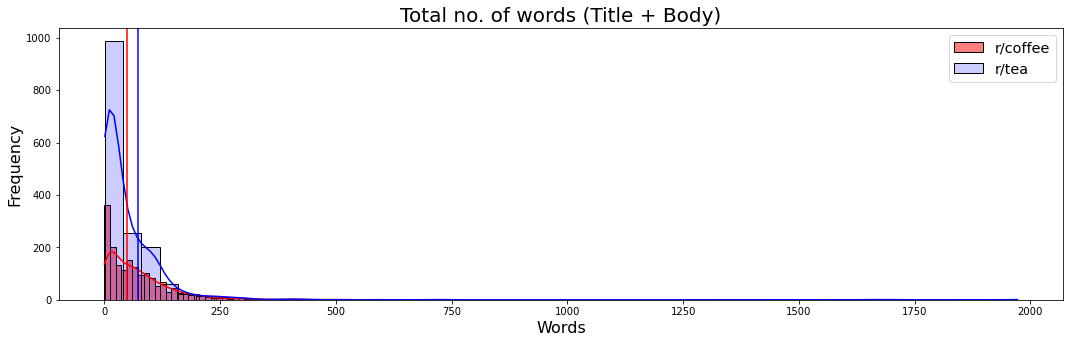

In [29]:
# making a histogram of the two post lengths

sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(18, 5))
sns.histplot(coffee_df['num_words'], kde=True, bins=50, label="r/coffee", color="red",alpha=0.5)
sns.histplot(tea_df['num_words'], kde=True, bins=50, label="r/tea", color="blue",alpha=0.2)
plt.title("Total no. of words (Title + Body)", size=20)
plt.xlabel("Words", size=16)
plt.ylabel("Frequency", size=16)
plt.legend(fontsize="x-large")
plt.axvline(x=coffee_df['num_words'].mean(),c='blue')
plt.axvline(x=tea_df['num_words'].mean(),c='red');

> **Interpretation:**
> 
> The posts in r/tea tend to be shorter than the posts in r/coffee. 
> We do not have enough information at this point in time, to explain this observation. One possible explanation however, is that more posts in tea are in visual format e.g. images or videos or external links. 

In [30]:
print(f"Avg num_words in coffee_df full_text: {coffee_df['num_words'].mean()}.")
print(f"Avg num_words in tea_df full_text: {tea_df['num_words'].mean()}.")

Avg num_words in coffee_df full_text: 72.82924043403769.
Avg num_words in tea_df full_text: 48.35668789808917.


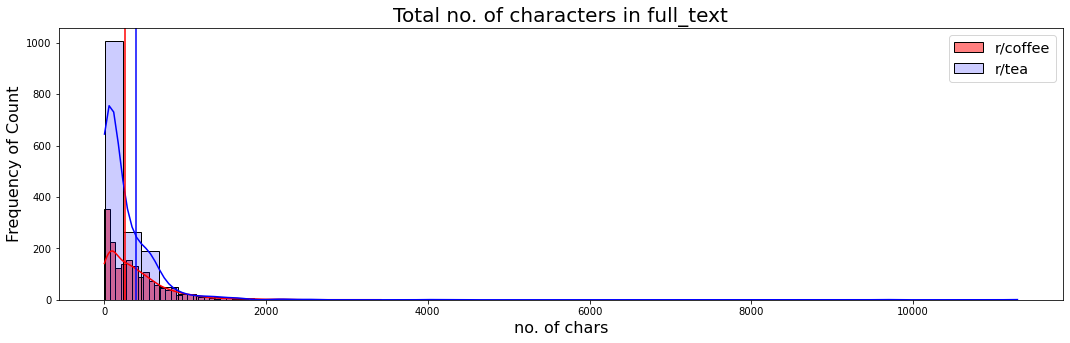

In [31]:
# making a histogram of the two post lengths
plt.figure(figsize=(18, 5))
sns.histplot(coffee_df['num_chars'], kde=True, bins=50, label="r/coffee", color="red",alpha=0.5)
sns.histplot(tea_df['num_chars'], kde=True, bins=50, label="r/tea", color="blue",alpha=0.2)
plt.title("Total no. of characters in full_text", size=20)
plt.xlabel("no. of chars", size=16)
#plt.xticks(range(0, 3_000, 100))
plt.ylabel("Frequency of Count", size=16)
plt.legend(fontsize="x-large")
plt.axvline(x=coffee_df['num_chars'].mean(),c='blue')
plt.axvline(x=tea_df['num_chars'].mean(),c='red');

> **Interpretation:**
> 
> Similar interpretation as for the number of words. 
> The posts in r/tea tend to be shorter than the posts in r/coffee. 
> We do not have enough information at this point in time, to explain this observation. One possible explanation however, is that more posts in tea are in visual format e.g. images or videos or external links. 

In [32]:
print(f"Avg num_chars in coffee_df full_text: {coffee_df['num_chars'].mean()}.")
print(f"Avg num_chars in tea_df full_text: {tea_df['num_chars'].mean()}.")

Avg num_chars in coffee_df full_text: 398.10222729868644.
Avg num_chars in tea_df full_text: 261.1891719745223.


> **Interpretation**
> 
> * Based on the lemmatized text data, tea df seems to have mostly short posts as compared to tea df; both based on the number of characters and number of words. 
> * It is noted that this analysis is mainly restricted to textual data, while reddit posts accept a variety of format including images, videos, external links. We do not have enough information at this point in time to explain why posts in r/tea tend to be shorted than in r/coffee - it could be that the authors are leveraging on other content methods to convey their messages.

### Filtering out very short posts

> **Note:** The purpose of dropping short reddit submissions is to limit the amount of noisy data used to build the classification models. It is noted however, that with actual unseen data, we will not be able to pick-and-choose which types of submissions to run through the model. 

In [33]:
coffee_df[coffee_df.num_words < 10].tail()

,title,selftext,full_text,subreddit,clean_full_text,num_chars,num_words
1969,Spinn Machine…5 year wait worth it!,,Spinn Machine…5 year wait worth it!,Coffee,Spinn Machine…5 year wait worth it!,37,6
1976,Identify this machine?,,Identify this machine?,Coffee,Identify this machine?,24,3
1980,who's up for coffee buddy?,,who's up for coffee buddy?,Coffee,who's up for coffee buddy?,28,5
1983,When you try to make coffee before having coffee,,When you try to make coffee before having coffee,Coffee,When you try to make coffee before having coffee,50,9
1994,Is Excess Chaff an Indicator of Anything?,,Is Excess Chaff an Indicator of Anything?,Coffee,Is Excess Chaff an Indicator of Anything?,43,7


In [34]:
tea_df[tea_df.num_words < 5].head()

,title,selftext,full_text,subreddit,clean_full_text,num_chars,num_words
23,new loose tea diffuser,,new loose tea diffuser,tea,new loose tea diffuser,24,4
34,International Tea Day,,International Tea Day,tea,International Tea Day,23,3
49,my favorite tea!,,my favorite tea!,tea,my favorite tea!,18,3
50,#teatime,,#teatime,tea,#teatime,10,1
52,Sunday Ceylon,,Sunday Ceylon,tea,Sunday Ceylon,15,2


In [35]:
# drop rows in coffee with < 10 words, and in tea with < 5 words as they seem to contain nonsensical info

coffee_df.drop(coffee_df[coffee_df.num_words < 10].index, inplace=True)
tea_df.drop(tea_df[tea_df.num_words < 5].index, inplace=True)

### Applying Lemmatization

**Note:** I decided to apply lemmatizing only (not stemming) to the text data. It is noted that the basic nltk lemmatizer works on nouns only. In order to lemmatize verbs too, I have utilised a function get_wordnet_pos which will derive the nouns linked to a verb, based on parts of speech.

In [36]:
lemmatizer= nltk.WordNetLemmatizer()
stop_words = stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

> **Note:** Lemmatization by default, treats all the words passed to it as nouns. Therefore, we should lemmatize the words based on their respective parts of speech by using the function above.

In [38]:
def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[^a-zA-Z]',' ',text)
    tokens = re.split('\W+', text)
    text = " ".join([lemmatizer.lemmatize(word,get_wordnet_pos(word)) for word in tokens if word not in stop_words])
    return text

In [39]:
coffee_df['clean_full_text'] = coffee_df['clean_full_text'].apply(lambda x: clean_text(x.lower()))
tea_df['clean_full_text'] = tea_df['clean_full_text'].apply(lambda x: clean_text(x.lower()))

### Visualising Common Words/Phases

**Note:** I applied CountVectorizer to vectorize the full_text into uni-grams, bi-grams and tri-grams, which will create a new column for every unique n-gram and count their occurrences.

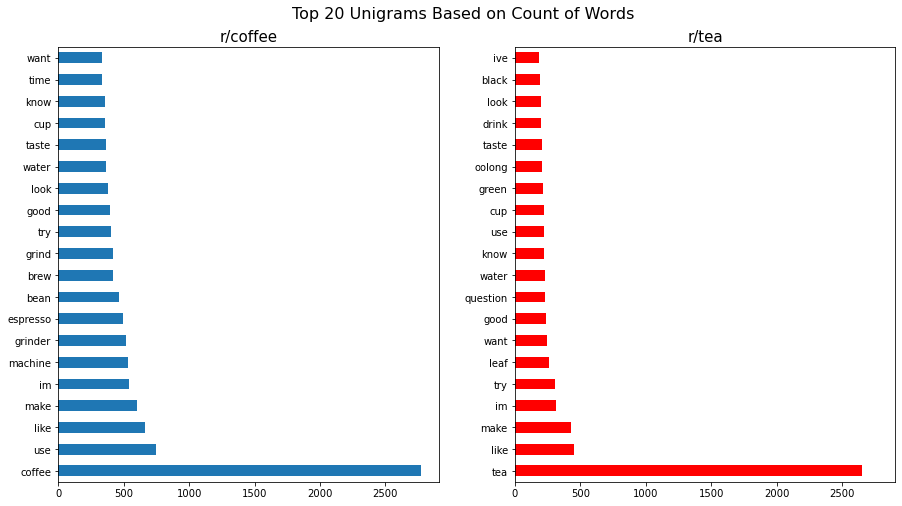

In [40]:
# subplots to visualise top singular words/features using Count Vectorizer

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8), sharex=True)
ax = ax.ravel() 

plt.subplots_adjust(hspace = 0.1)

# plot for coffee_df

cv1 = CountVectorizer(stop_words='english', min_df=3)
cv1.fit(coffee_df['clean_full_text'])

pl_alltext_cv = cv1.transform(coffee_df['clean_full_text'])
pl_alltext_df = pd.DataFrame(pl_alltext_cv.todense(), columns=cv1.get_feature_names())
pl_alltext_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[0])
ax[0].set_title('r/coffee',size=15)

# plot for coffee_df

cv2 = CountVectorizer(stop_words='english', min_df=3)
cv2.fit(tea_df['clean_full_text'])

pc_alltext_cv = cv2.transform(tea_df['clean_full_text'])
pc_alltext_df = pd.DataFrame(pc_alltext_cv.todense(), columns=cv2.get_feature_names())
pc_alltext_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[1],color='r')
ax[1].set_title('r/tea',size=15)

plt.suptitle('Top 20 Unigrams Based on Count of Words', fontsize=16, y=0.95);

> **Interpretation**
> 
> * Not surprising that 'coffee' and 'tea' and the most common words in the respective dfs. I will certainly drop them later so that my model will be able to classify accurately without depending on these two obvious keywords.
> * Using the standard nltk stopwords corpus was insufficient to drop common inflected words such as im (for I am) and ive (for I have). 
> * Both dfs also have common words linked to drinking/beverages such as use, like, make, drink, cup, water, taste. For these common words, I will add them into a custom list of stopwords and exclude them from the corpus before modelling.

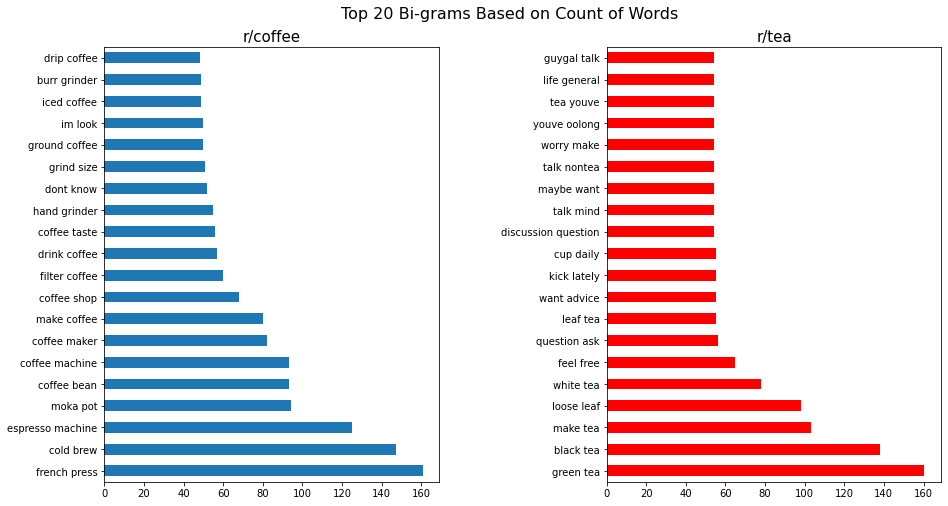

In [41]:
# subplots to visualise top two-words phrases/features using Count Vectorizer

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8),sharex=True)
ax = ax.ravel() 

plt.subplots_adjust(wspace= 0.5)

# plot for prolife_df

cv1_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv1_bigrams.fit(coffee_df['clean_full_text'])

pl_bigrams_cv = cv1_bigrams.transform(coffee_df['clean_full_text'])
pl_bigrams_df = pd.DataFrame(pl_bigrams_cv.todense(), columns=cv1_bigrams.get_feature_names())
pl_bigrams_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[0])
ax[0].set_title('r/coffee',size=15)

# plot for prochoice_df

cv2_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english')
cv2_bigrams.fit(tea_df['clean_full_text'])

pc_bigrams_cv = cv2_bigrams.transform(tea_df['clean_full_text'])
pc_bigrams_df = pd.DataFrame(pc_bigrams_cv.todense(), columns=cv2_bigrams.get_feature_names())
pc_bigrams_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[1],color='r')
ax[1].set_title('r/tea',size=15)

plt.suptitle('Top 20 Bi-grams Based on Count of Words', fontsize=16, y=0.95);

> **Interpretation**
> 
> * Except for a couple of unexpected values i.e. 'im look' and 'dont know', the bigrams identified with highest occurrences in the coffee df are logical phrases linked to coffee. 
> * For tea df, there seem to be more noisy data i.e. illogical phrases that are not related to tea such as 'im look', 'tea im', 'tea ive', 'ive try'.
> * It is noted that when I drop 'tea', I will not be able to form bigrams like 'green tea' or 'black tea'. As such, if single features like 'green' or 'black' appears at the modelling stage, I may relate to their proximity to tea. 

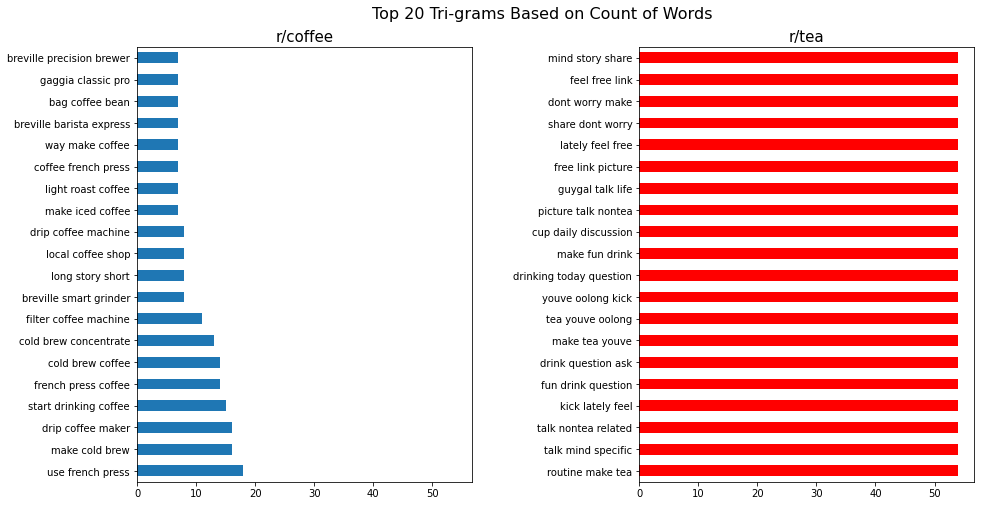

In [42]:
# subplots to visualise top three-words phrases/features using Count Vectorizer

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15,8),sharex=True)
ax = ax.ravel() 

plt.subplots_adjust(wspace= 0.5)

# plot for coffee_df

cv1_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv1_trigrams.fit(coffee_df['clean_full_text'])

pl_trigrams_cv = cv1_trigrams.transform(coffee_df['clean_full_text'])
pl_trigrams_df = pd.DataFrame(pl_trigrams_cv.todense(), columns=cv1_trigrams.get_feature_names())
pl_trigrams_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[0])
ax[0].set_title('r/coffee',size=15)

# plot for tea_df

cv2_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english')
cv2_trigrams.fit(tea_df['clean_full_text'])

pc_trigrams_cv = cv2_trigrams.transform(tea_df['clean_full_text'])
pc_trigrams_df = pd.DataFrame(pc_trigrams_cv.todense(), columns=cv2_trigrams.get_feature_names())
pc_trigrams_df.sum().sort_values(ascending=False).head(20).plot(kind='barh',ax=ax[1],color='r')
ax[1].set_title('r/tea',size=15)
plt.suptitle('Top 20 Tri-grams Based on Count of Words', fontsize=16, y=0.95);

> **Interpretation:**
> * The top 20 tri-grams from coffee df seems logical, with phrases commonly related to consuming coffee. In fact, the focus on the tri-grams seem to be on the technique or technology or machinery required to prepare coffee beverages. A popular brand name, Breville, appears several times.  
> * In contrast, the top 20 tr-grams from tea df do not seem to be related to tea at all. Additionally, most of the funky tri-grams seem to appear with the same no. of occurrences. I will address this issue below, as it recurred again during the first round of modelling.

### Additional Finding: Noisy Data

> **Note:** Based on a first round of modelling, I realised that there is a series of daily recurring posts which are adversely affecting my modelling results. This series of posts is generated by the automoderator (hence not flagged as spam by reddit) and repeated every single day, seemingly to attract more discussions and responses from followers. I decided to drop this series from the dataset. This series was also the source of the unexpected tri-grams that are found earlier.  A screenshot of one of the posts is shown in the image below:

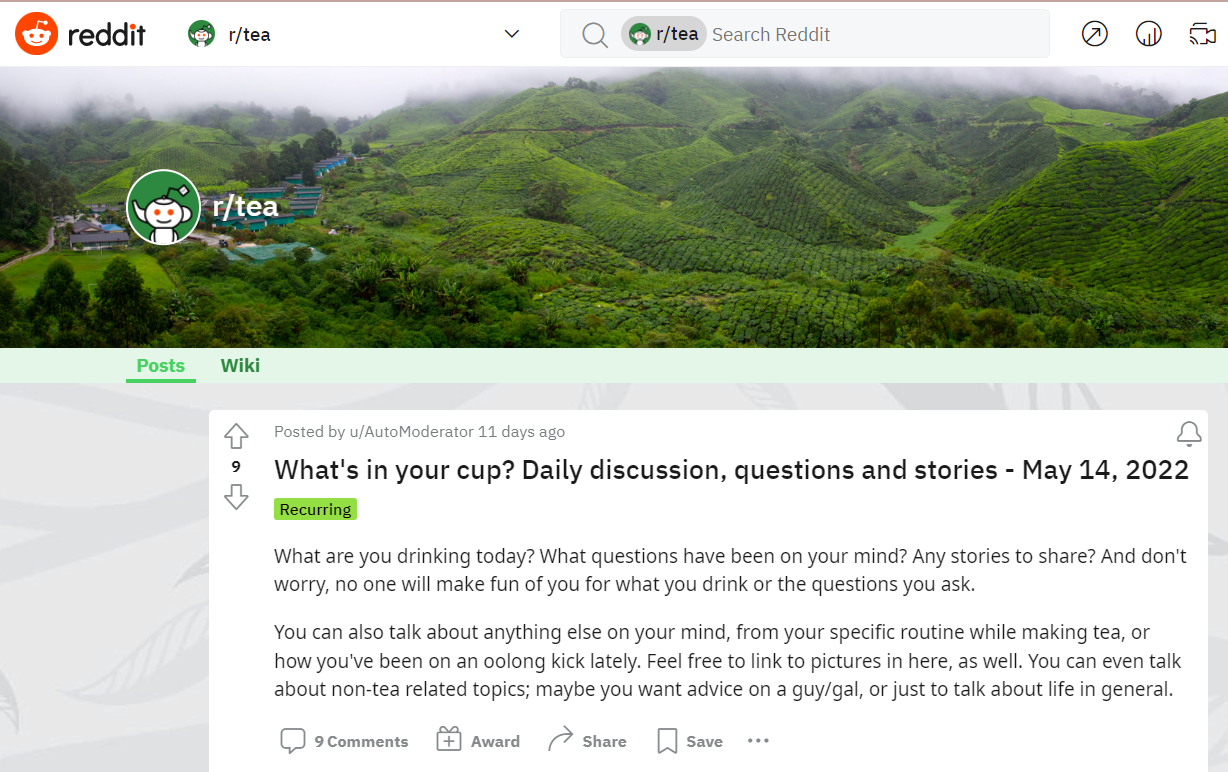

In [43]:
# 'guygal talk life', 'drink question ask' etc all come from a single source...
# total 54 rows 
tea_df[tea_df.clean_full_text.str.contains('guygal', na=False)]

,title,selftext,full_text,subreddit,clean_full_text,num_chars,num_words
25,"What's in your cup? Daily discussion, questions and stories - May 23, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 23, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
58,"What's in your cup? Daily discussion, questions and stories - May 22, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 22, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
86,"What's in your cup? Daily discussion, questions and stories - May 21, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 21, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
125,"What's in your cup? Daily discussion, questions and stories - May 20, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 20, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
160,"What's in your cup? Daily discussion, questions and stories - May 19, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 19, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
214,"What's in your cup? Daily discussion, questions and stories - May 18, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 18, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
249,"What's in your cup? Daily discussion, questions and stories - May 17, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 17, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
328,"What's in your cup? Daily discussion, questions and stories - May 15, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 15, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
359,"What's in your cup? Daily discussion, questions and stories - May 14, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 14, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107
390,"What's in your cup? Daily discussion, questions and stories - May 13, 2022",What are you drinking today? What questions have been on your mind? Any stories to share? And...,"What's in your cup? Daily discussion, questions and stories - May 13, 2022 What are you drinking...",tea,whats cup daily discussion question story may drinking today question mind story share dont worr...,573,107


In [44]:
# drop the columns
tea_df.drop(tea_df[tea_df.clean_full_text.str.contains('guygal', na=False)].index, inplace=True)

### Concat dfs and Export to csv

In [45]:
# concat coffee df and tea df into one giant df, reset index
submissions = pd.concat([coffee_df,tea_df])
submissions.reset_index(drop=True,inplace=True)

In [46]:
# extract df to csv to work with in notebook3
submissions.to_csv('./data/submissions.csv',index=False)